In [15]:
import pandas as pd
from math import log
from statistics import mean,variance
from math import exp,sqrt,pi
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns 

In [16]:
def calc_probability(con_col_name='',con_val='',target_col_name='',target_val='',training_data='',smooth_factor_dict={},mean_n_variance_dict={},attr_dict={}):
      """
    Calculate the probability based on the given conditions and training data.

    Parameters:
    - con_col_name: Name of the conditioning column (default: '')
    - con_val: Value of the conditioning column (default: '')
    - target_col_name: Name of the target column (default: '')
    - target_val: Value of the target column (default: '')
    - training_data: Training data as a DataFrame (default: '')
    - smooth_factor_dict: Dictionary containing smoothing factors for categorical columns (default: {})
    - mean_n_variance_dict: Dictionary containing mean and variance values for continuous columns (default: {})
    - attr_dict: Dictionary containing attribute information for columns (default: {})

    Returns:
    - probability: Calculated probability based on the given conditions and training data.
    """
    probability=0
    if con_col_name=='':
        comp=training_data[target_col_name]==target_val
        count_of_cond_tar=sum(comp)
        probability=count_of_cond_tar/len(training_data)
        
    elif attr_dict[con_col_name]=='CAT':
        comp=training_data[target_col_name]==target_val
        count_of_cond_tar=sum(comp)
        count_of_cond=sum(training_data[comp][con_col_name]==con_val)
        probability=(count_of_cond+1)/(count_of_cond_tar+smooth_factor_dict[con_col_name])
    
    elif attr_dict[con_col_name]=='CON':
        mea=mean_n_variance_dict[con_col_name][target_val][0]
        var=mean_n_variance_dict[con_col_name][target_val][1]
        probability=exp(-1*((target_val-mea)**2)/(2*var))/sqrt(2*pi*var)
        
        
        
    return probability     

In [17]:
"""
    Calculate the smoothing factor for categorical columns in the training data.

    Parameters:
    - training_data (DataFrame): The training data.
    - training_cols (list): List of column names in the training data.
    - attr_dict (dict): Dictionary containing attribute types for each column.

    Returns:
    - smooth_factor_dict (dict): Dictionary mapping categorical column names to their smoothing factors.
    """
def calc_smoothing_factor(training_data,training_cols,attr_dict):
    smooth_factor_dict={}
    for col in training_cols:
        if attr_dict[col]=='CAT':
            smooth_factor_dict[col]=training_data[col].nunique()
        
    return smooth_factor_dict

In [18]:
def calc_mean_n_variance(training_data,training_cols,attr_dict,all_classes,target_col_name):
      """
    Calculate the mean and variance for each attribute in the training data, grouped by target classes.

    Args:
        training_data (DataFrame): The training data containing the attribute values and target column.
        training_cols (list): List of attribute columns.
        attr_dict (dict): Dictionary specifying the attribute type (e.g., 'CON' for continuous).
        all_classes (list): List of all possible target classes.
        target_col_name (str): Name of the target column.

    Returns:
        mean_n_variance_dict (dict): Dictionary with mean and variance for each attribute and target class.

    """
    mean_n_variance_dict={}
    for col in training_cols:
        if attr_dict[col]=='CON':
            all_classes_dict={}
            for e_class in all_classes:
                mea=mean(list(training_data[training_data[target_col_name]==e_class][col]))
                var=variance(list(training_data[training_data[target_col_name]==e_class][col]))
                all_classes_dict[e_class]=[mea,var]
            mean_n_variance_dict[col]=all_classes_dict
        
    return mean_n_variance_dict

In [19]:
#Reading the training and testing csv files
df=pd.read_csv('C:/Users/moury/Documents/titanic/train.csv')

df_test=pd.read_csv('C:/Users/moury/Documents/titanic/test.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
#Setting all necessary attributes for training and target
training_cols=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] #PassengerId,Name,Ticket,Cabin was not included
target_col='Survived'
all_cols=[x for x in training_cols]
all_cols.append(target_col)
attr_dict={'PassengerId':'CAT', 
           'Pclass':'CAT', 
           'Name':'CAT', 
           'Sex' :'CAT',
           'Age':'CON',
           'SibSp':'CAT', 
           'Parch':'CAT', 
           'Ticket' :'CAT',
           'Fare':'CON',
           'Cabin':'CAT',
           'Embarked':'CAT'}

In [21]:
#Cleaning the training data
df_clean=df[all_cols]
df_clean=df_clean[~df_clean.isna().any(axis=1)]

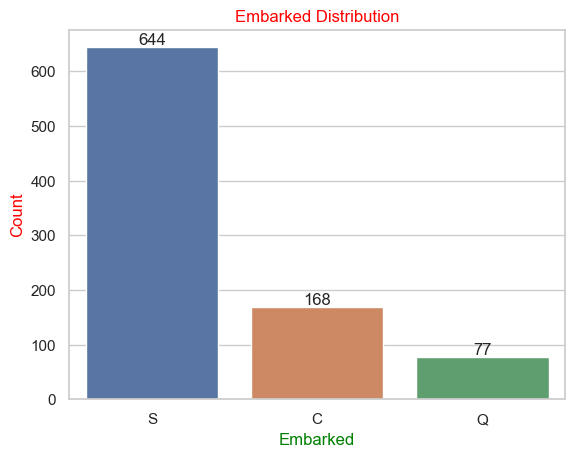

In [22]:
#Embarked distribution visualozation

# Set the style of the plot
ax = sns.set(style="whitegrid")

ax = sns.countplot(data=df,x='Embarked');
ax.bar_label(ax.containers[0])

plt.title('Embarked Distribution',color='Red',loc='center');

# Set the label for the x-axis
plt.xlabel('Embarked',color='Green',loc='center')

# Set the label for the y-axis
plt.ylabel('Count',color='Red',loc='center');

plt.show()


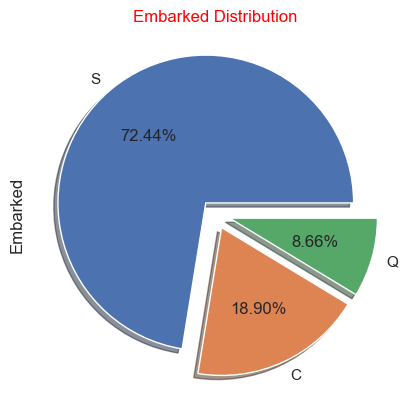

In [23]:
# Create a pie chart of the 'Embarked' column

df['Embarked'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Embarked Distribution',color='Red',loc='center');



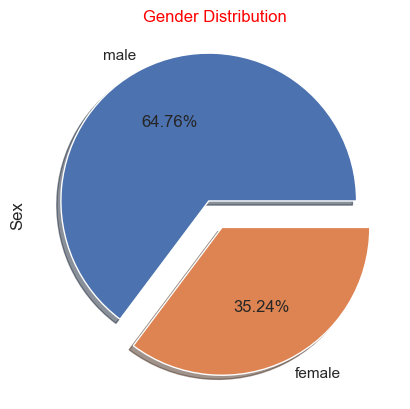

In [24]:
#Gender distribution 
df['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Gender Distribution',color='Red',loc='center');

([<matplotlib.axis.XTick at 0x2352e139f00>,
 [Text(1, 0, 'First'), Text(2, 0, 'Second'), Text(3, 0, 'Third')])

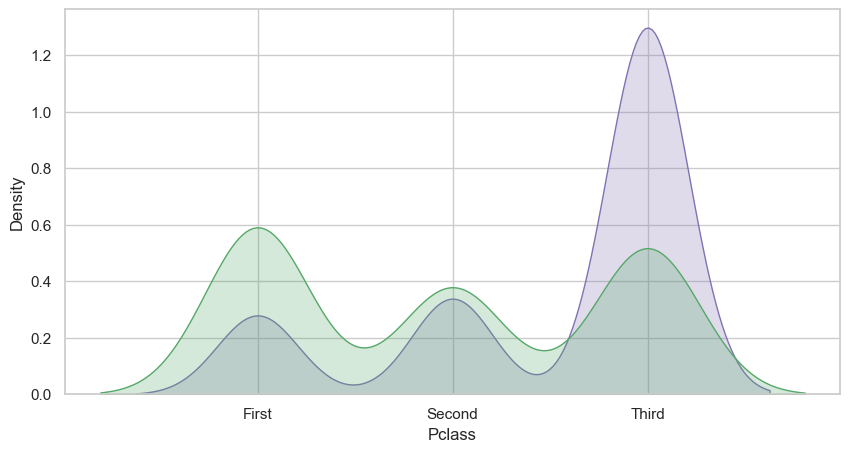

In [54]:
plt.subplots(figsize=(10,5))
sns.kdeplot(df.loc[df['Survived'] == 0, 'Pclass'], fill=True, color='m', label='Not Survived')
ax = sns.kdeplot(df.loc[df['Survived'] == 1, 'Pclass'], fill=True, color='g', label='Survived')

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(df.Pclass.unique()),labels)

C:\Users\moury\AppData\Local\Temp\ipykernel_22116\902673139.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


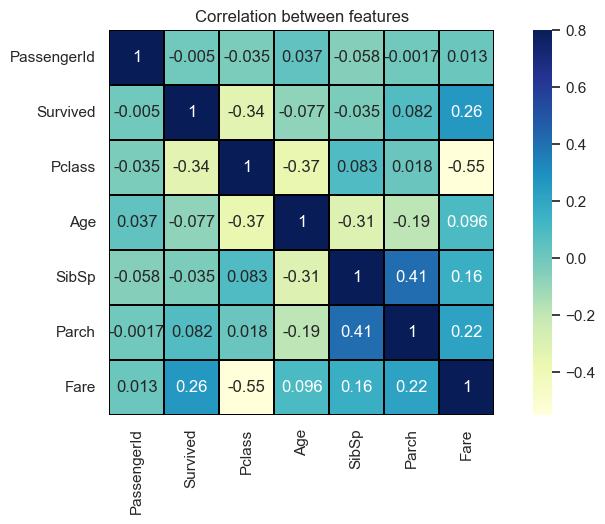

In [25]:
#Heatmap

corr=df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

In [47]:
#Calculating all the necessary parameters from Training Data
all_classes=df_clean[target_col].unique()
df_predicted=pd.DataFrame()
smooth_factor_dict=calc_smoothing_factor(df_clean,training_cols,attr_dict)
mean_n_variance_dict=calc_mean_n_variance(df_clean,training_cols,attr_dict,all_classes,target_col)

#Predicting for all the rows in test_data i.e. df_test data frame
for (index,row) in df_test.iterrows():
    probability_dict={}
    for pred_class in all_classes:        
        sum_of_logs=0
        for col in training_cols:
            sum_of_logs+=log(calc_probability(col,row[col],target_col,pred_class,df_clean,smooth_factor_dict,mean_n_variance_dict,attr_dict),2)
        sum_of_logs+=log(calc_probability(target_col_name=target_col,target_val=pred_class,training_data=df_clean),2)
        probability_dict[pred_class]=sum_of_logs
    row_dict=row.to_dict()
    row_dict[target_col]=max(probability_dict.keys(),key=lambda x:probability_dict[x])
    
    row_df = pd.DataFrame([row_dict])
    df_predicted = pd.concat([df_predicted, row_df], ignore_index=True)
   
df_predicted    
#print(max(probability_dict.keys(),key=lambda x:probability_dict[x]))
#print(probability_dict)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [48]:
df_actual=pd.read_csv('C:/Users/moury/Documents/titanic/gender_submission.csv')
df_actual

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [49]:
df_predicted.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [50]:
acc=sum(df_actual.sort_values(by='PassengerId').Survived==
        df_predicted.sort_values(by='PassengerId').Survived)*100/len(df_actual)
print('Test Data Accuracy: {}%'.format(acc))

Test Data Accuracy: 84.92822966507177%
